In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np 
from bokeh.plotting import show, figure
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("Family_Income_and_Expenditure.csv") 

In [3]:
# spliting data in numeric and text
colnumber = len(data.columns)
data_number = pd.DataFrame()
data_text = pd.DataFrame()
for i in range(colnumber):
    if data.dtypes[i] == "int64":
        data_number[[data.columns[i]]] = pd.DataFrame(data.iloc[:,i])
    else:
        data_text[[data.columns[i]]] = pd.DataFrame(data.iloc[:,i])

# 3. Model 2 - Random Forest

## 3.1. Model only with numeric data

In [4]:
data_number_a = pd.get_dummies(data_number, columns=["Agricultural Household indicator"])

In [5]:
np.random.seed(42)
mask = np.random.rand(data_number_a.shape[0]) <= 0.7
print('Train set shape {0}, test set shape {1}'.format(data_number_a[mask].shape, data_number_a[~mask].shape))

Train set shape (29197, 47), test set shape (12347, 47)


In [7]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(data_number_a[mask].drop(["Total Household Income"], axis=1),
       data_number_a[mask]["Total Household Income"])
pred = rf.predict(data_number_a[~mask].drop(["Total Household Income"], axis=1))
print('RMSE = {0:.02f}'.format(np.sqrt(np.mean((pred - data_number_a[~mask]["Total Household Income"])**2))))

RMSE = 151298.47


In [8]:
rf.feature_importances_

array([4.22561356e-02, 4.76847311e-03, 4.62543826e-03, 4.82870759e-03,
       5.37585435e-03, 5.38439641e-03, 4.91831517e-03, 7.69199683e-03,
       2.56142509e-03, 1.71160156e-03, 1.13491525e-02, 1.52467367e-01,
       6.18682173e-03, 9.41311019e-03, 2.11393939e-02, 1.03684620e-01,
       7.19007828e-03, 3.26588952e-01, 1.04014110e-02, 2.67144284e-03,
       2.20951690e-01, 6.01015215e-03, 2.01009250e-03, 7.30375147e-04,
       9.71814708e-04, 3.45794498e-03, 3.70313887e-03, 3.76326845e-03,
       2.28681446e-03, 3.16942567e-05, 1.42696882e-03, 1.04923444e-03,
       8.29312478e-04, 1.17573881e-03, 4.22684145e-04, 2.77975645e-03,
       5.42655334e-03, 3.69850393e-04, 2.36368502e-03, 1.95446749e-03,
       1.07303476e-03, 1.44451184e-04, 1.23550545e-03, 3.29504778e-04,
       7.42787228e-05, 2.13294419e-04])

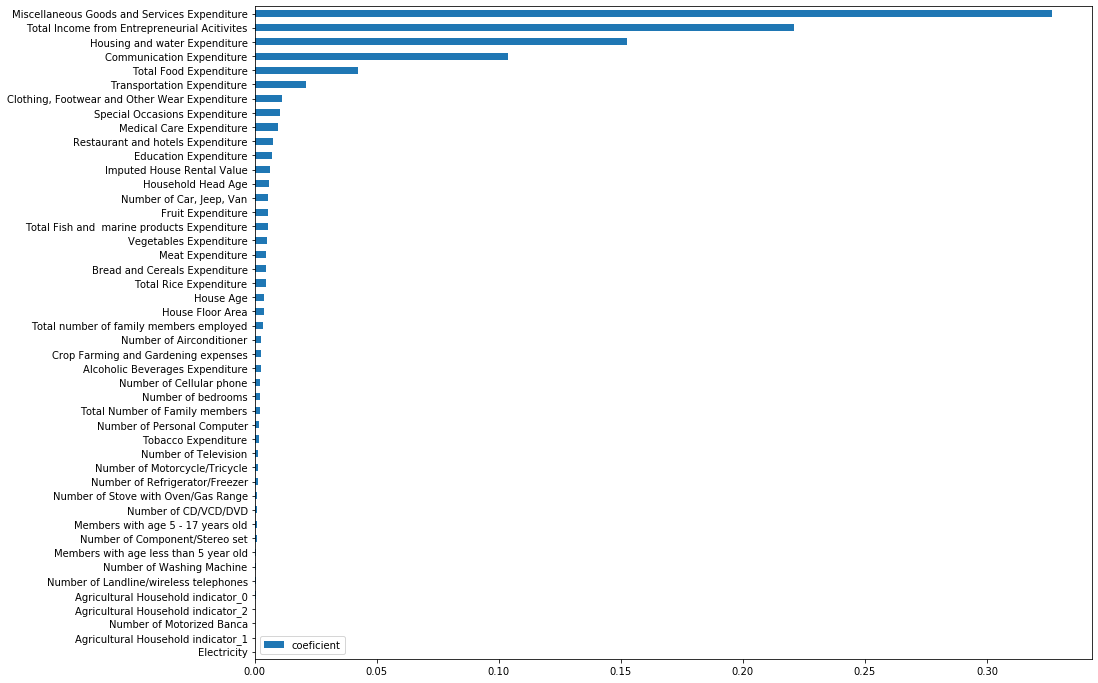

In [41]:
variable_importance = pd.DataFrame(rf.feature_importances_, columns=['coeficient'], index = data_number_a[mask].drop(["Total Household Income"], axis = 1).columns)
variable_importance.sort_values(by = ["coeficient"]).plot(kind='barh', figsize=(15,12))

foo <font color='red'>bar</font> foo